In [1]:
%run ../../common/import_all.py

import cv2

from common.setup_notebook import set_css_style, setup_matplotlib, config_ipython
config_ipython()
setup_matplotlib()
set_css_style()

# Thresholding an image

## Using OpenCV

In the following, we'll use the thresholding methods in OpenCV applied to a sample image. See the [API](http://docs.opencv.org/2.4/modules/imgproc/doc/miscellaneous_transformations.html?highlight=threshold#cv2.threshold) call `cv2.threshold` needs the gray image as first argument, the threshold $t$ as the second argument and the value to assign as the third argument in the case of a binary and binary inverted thresholding.

See [[1]] for an explanation of thresholding with graphics on OpenCV itself. 

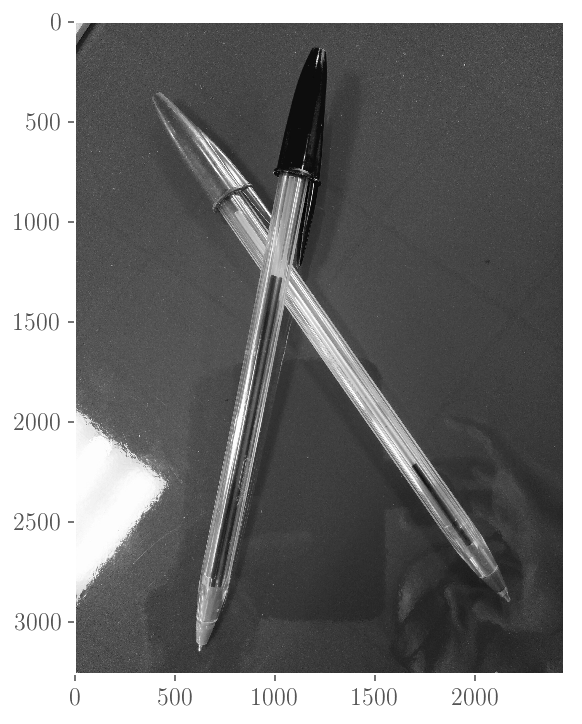

In [2]:
# Read an image for later
image = cv2.imread('../../imgs/pens.jpg')

# make it grayscale
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# show the image
plt.gray()
plt.grid()
plt.imshow(gray)
plt.show();

Thresholding is a way to modify the pixels of an image based on a given threshold in their intensity/colour.

## Simple Thresholding

Applied to grayscale images, it sets the pixel to a new value if it exceeds a given threshold and to another value otherwise. Modes are, calling $p(x, y)$ the pixel, $a$ the value to set and $t$ the threshold:

* **binary**: 
$$
p'(x, y) = 
\begin{cases}
a \ \text{if} \ p(x,y) > t \\
0 \ \text{else}
\end{cases}
$$

* **binary inverted**: 
$$
p'(x, y) = 
\begin{cases}
0 \ \text{if} \ p(x,y) > t \\
a \ \text{else}
\end{cases}
$$

* **threshold truncated**: 
$$
p'(x, y) = 
\begin{cases}
t \ \text{if} \ p(x,y) > t \\
p(x,y) \ \text{else}
\end{cases}
$$

* **threshold to zero**: 
$$
p'(x, y) = 
\begin{cases}
p(x,y) \ \text{if} \ p(x,y) > t \\
0 \ \text{else}
\end{cases}
$$

* **threshold to zero inverted**:
$$
p'(x, y) = 
\begin{cases}
0 \ \text{if} \ p(x,y) > t \\
p(x,y) \ \text{else}
\end{cases}
$$

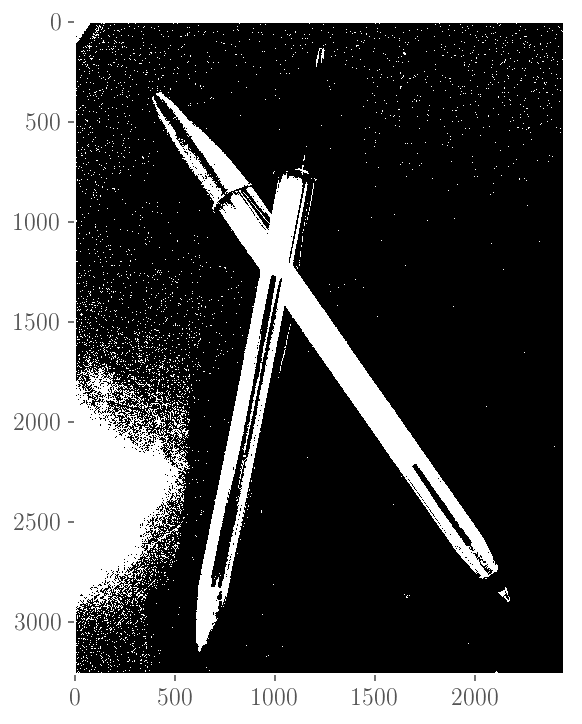

In [3]:
# binary threshold: put 255 (white) if pixel passes 100 threshold, 0 (black) otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY)[1]

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

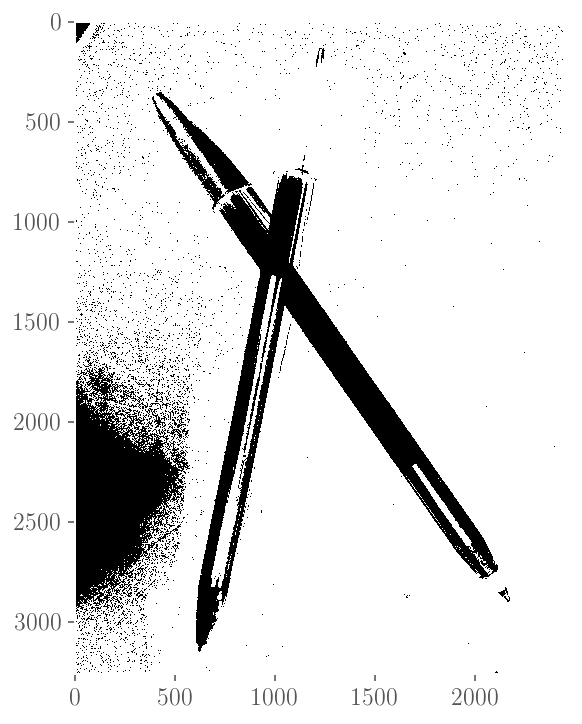

In [7]:
# binary inverted threshold: put 0 (black) if pixel passes 100 threshold, 255 (white) otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_BINARY_INV)[1]

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

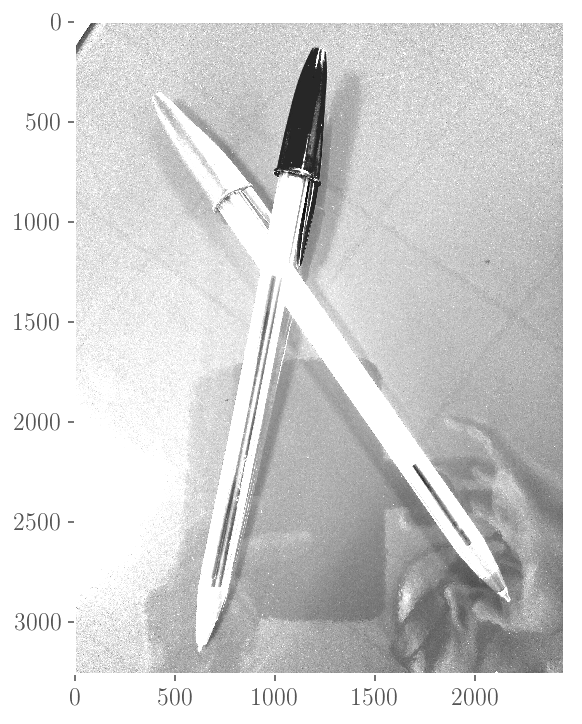

In [8]:
# binary truncated: put threshold value if pixel passes 100 threshold, keep pixel value otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_TRUNC)[1]   # note 255 here is useless but needed by method

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

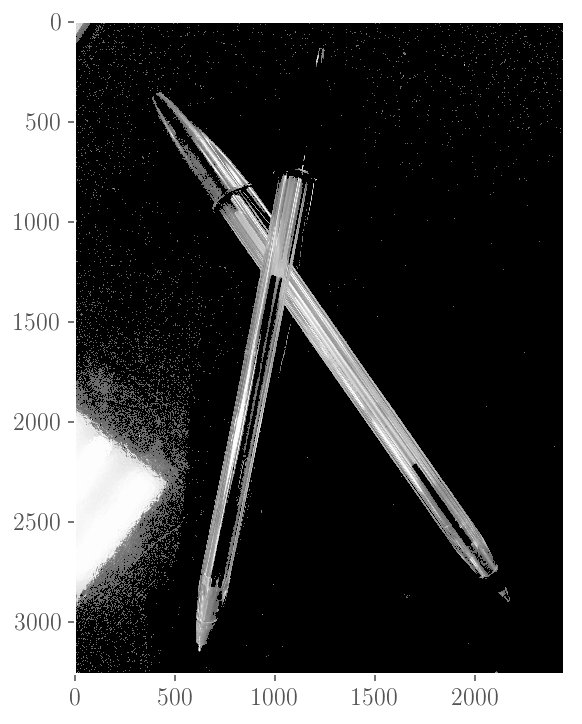

In [9]:
# to zero: put pixel value if pixel passes 100 threshold, 0 otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_TOZERO)[1]   # note 255 here is useless but needed by method

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

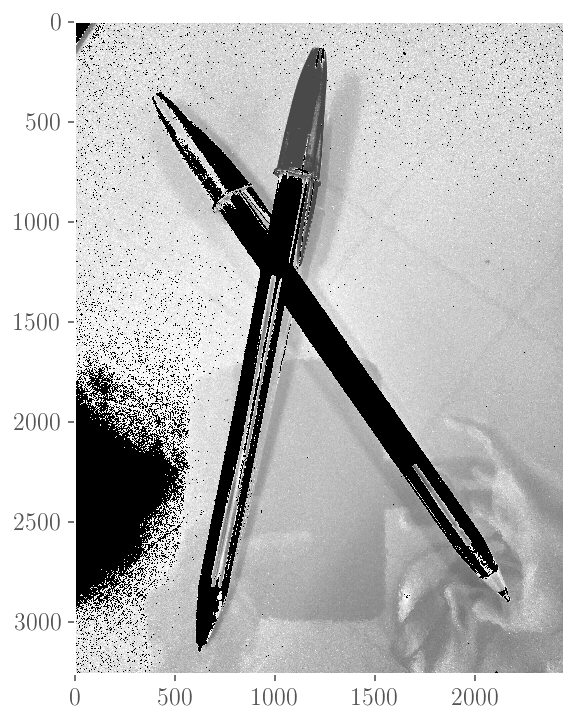

In [10]:
# to zero inverted: put 0 if pixel passes threshold, keep pixel value otherwise

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_TOZERO_INV)[1]   # note 255 here is useless but needed by method

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

## Adaptive Thresholding

Applied to grayscale images, the threshold is calculated locally so it is different for each region and this accounts for different conditions like illumination. Modes are *binary* and *binary inverted*, as above, with the difference that $t = t(x, y)$. The pixel gets set to a specified new value. Methods are:

* **Adaptive mean**: $t(x, y)$ is the average of the neighbourhood of pixel $p(x, y)$, the neighborhood being a square of specified size around pixel
* **Adaptive gaussian**: $t(x, y)$ is a weighted sum, with gaussian weights of the neighbourhood of pixel $p(x, y)$. The standard deviation depends on the block size. 

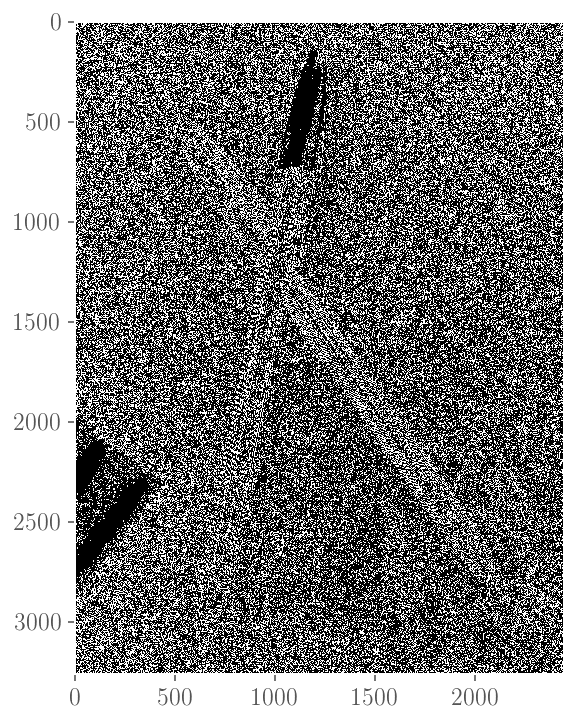

In [18]:
# adaptive mean thresholding with binary method and a neighborhood of 3X3
# note that last arg (required) gets subtracted from the mean for computing the threshold

dest = cv2.adaptiveThreshold(gray, 100, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 3, 0)

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

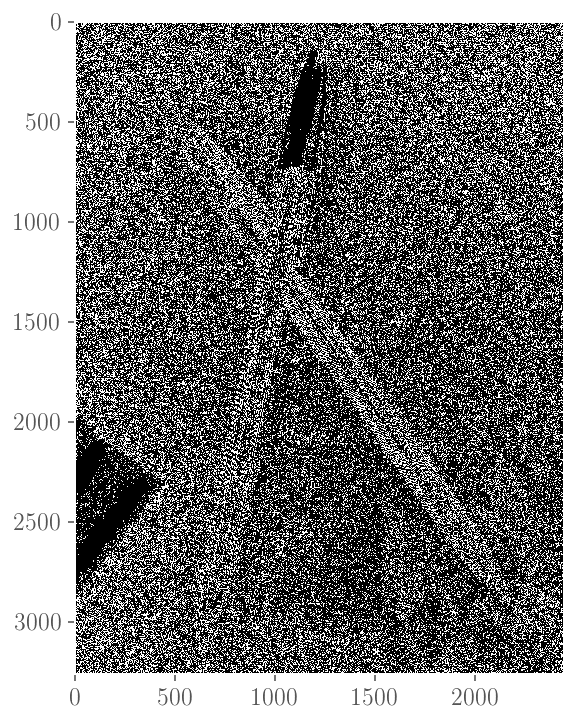

In [19]:
# adaptive gaussian thresholding with binary method and a neighborhood of 3X3
# note that last arg (required) gets subtracted from the mean for computing the threshold

dest = cv2.adaptiveThreshold(gray, 100, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 3, 0)

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

## Otsu's Binarization Thresholding

This [[2]](#otsu) is a global thresholding method but the value of the threshold is computed as the mean value in between the two peaks of a [bimodal image](../some-glossary.ipynb#Bimodal-image). For this reason, it is not good on non-bimodal images. It minimises the weighted within-class variance where a class is the set of pixels around a peak. 

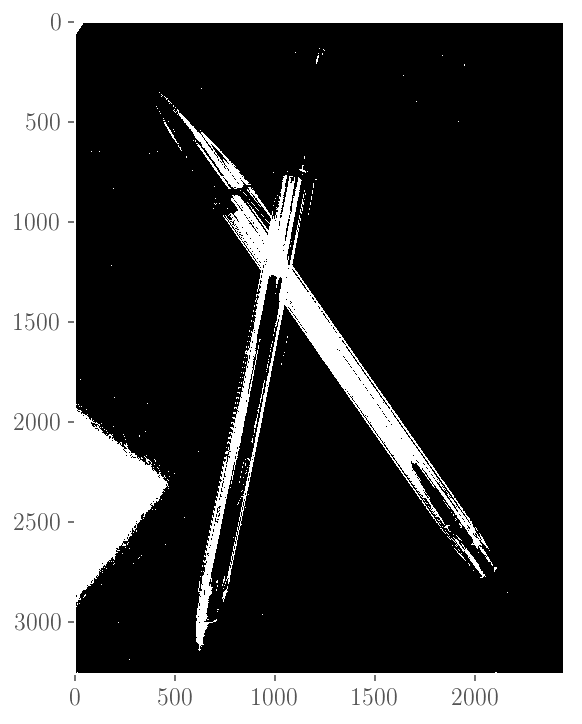

In [21]:
# Otsu binarisation

dest = cv2.threshold(gray, 100, 255, cv2.THRESH_OTSU)[1]

plt.gray()
plt.grid()
plt.imshow(dest)
plt.show();

## References

1. <a name="opencv"></a> The [explanation](http://docs.opencv.org/2.4/doc/tutorials/imgproc/threshold/threshold.html) of thresholding on OpenCV itself
2. <a  name="otsu"></a> N Otsu, [**A Threshold Selection Method from Gray-Level Histograms**](http://web-ext.u-aizu.ac.jp/course/bmclass/documents/otsu1979.pdf), *IEEE Transactions on Systems, Man and Cybernetics*, 9, 1979.